In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("User_Data.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x=data.iloc[:,[2,3]]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [4]:
y=data.iloc[:,4]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
x_train=standard.fit_transform(x_train)
x_test=standard.fit_transform(x_test)

In [11]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [12]:
y_pred=classifier.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[63,  5],
       [ 7, 25]], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy*100

88.0

In [16]:
#importing the plot decision regions class from mlxtend.plotting library  (please install the mlxtend library first)
from mlxtend.plotting import plot_decision_regions

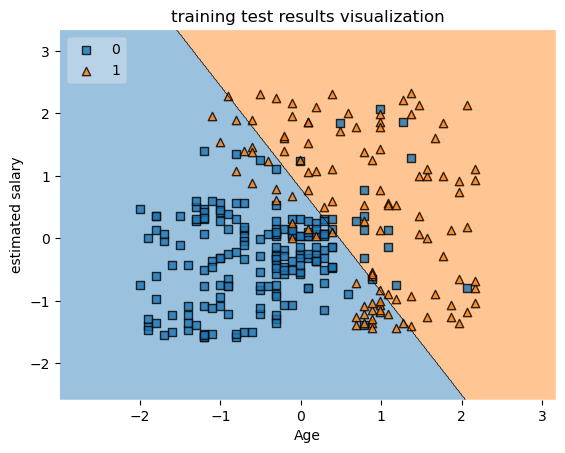

In [17]:
#plotting the decision boundary
plot_decision_regions(x_train,y_train.to_numpy(),clf=classifier,legend=2)

#title of graph
plt.title("training test results visualization")

#xlabel
plt.xlabel("Age")

#ylabel
plt.ylabel("estimated salary")

#show (0 means not purchased the car and 1 means who purchased the car)
plt.show()

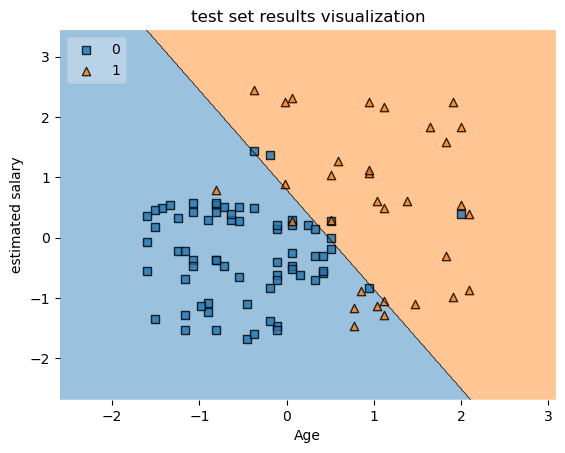

In [18]:
#plotting the decision boundary
plot_decision_regions(x_test,y_test.to_numpy(),clf=classifier,legend=2)

#title of graph
plt.title("test set results visualization")

#xlabel
plt.xlabel("Age")

#ylabel
plt.ylabel("estimated salary")

#show (0 means not purchased the car and 1 means who purchased the car)
plt.show()
